In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import operator
import functions

#### *Dataset of October and dataset of November*

In [2]:
dataset_Oct = pd.read_csv('2019-Oct.csv.zip', memory_map = True) 

In [2]:
dataset_Nov = pd.read_csv('2019-Nov.csv.zip', low_memory=True)

##### *Visualize the data type of the columns*

In [4]:
dataset_Oct.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

#### *Dataset of small dimension (1000000 rows)*

In [2]:
datasetOct = pd.read_csv('2019-Oct.csv', sep=',', 
                      delimiter=None, header='infer', #Default: infer the column names
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",   #Encoding to use for ISO when reading/writing (Central and Eastern Europe - Windows only)
                      nrows = 1000000,
                      parse_dates=['event_time'],
                      date_parser=pd.to_datetime)

In [3]:
datasetNov = pd.read_csv('2019-Nov.csv', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],
                      date_parser=pd.to_datetime)

In [4]:
datasetDic = pd.read_csv('2019-Dec.csv.gz', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],   
                      date_parser=pd.to_datetime)

In [5]:
datasetGen = pd.read_csv('2020-Jan.csv.gz', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],   
                      date_parser=pd.to_datetime)

In [6]:
datasetFeb = pd.read_csv('2020-Feb.csv.gz', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],   
                      date_parser=pd.to_datetime)

In [7]:
datasetMar = pd.read_csv('2020-Mar.csv.gz', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],   
                      date_parser=pd.to_datetime)

In [8]:
datasetApr = pd.read_csv('2020-Apr.csv.gz', sep=',', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1",
                      nrows = 1000000,
                      parse_dates=['event_time'],   
                      date_parser=pd.to_datetime)

In [ ]:
#In case there are some null values, we can think to use only the not null values in this way:
cat_code_set = dataset_Oct.category_code.notnull()
brand_set = dataset_Oct.brand.notnull()
user_session_set = dataset_Oct.user_session.notnull()

#### [RQ1] :
A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. \
Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. 
* Which is the rate of complete funnels?
* What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).


 October 2019 

The rate of complete funnels is:  6.71 %
Operation that users repeat more on average within a session is:  view


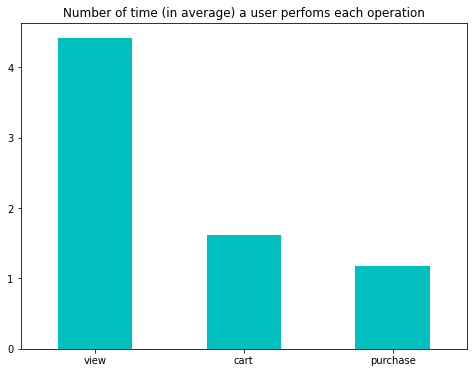

In [5]:
print('\n October 2019 \n')
functions.funnel(dataset_Oct)
functions.operation(dataset_Oct)


 November 2019 

The rate of complete funnels is:  10.82 %
Operation that users repeat more on average within a session is:  view


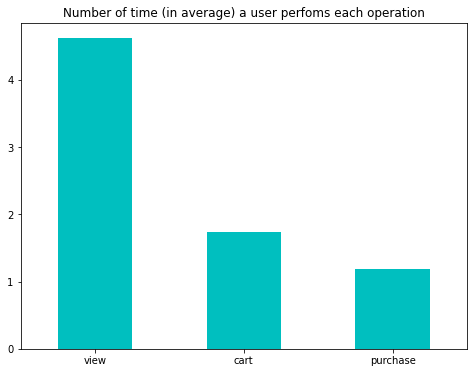

In [6]:
print('\n November 2019 \n')
functions.funnel(dataset_Nov)
functions.operation(dataset_Nov)


 December 2019 

The rate of complete funnels is:  8.52 %
Operation that users repeat more on average within a session is:  view


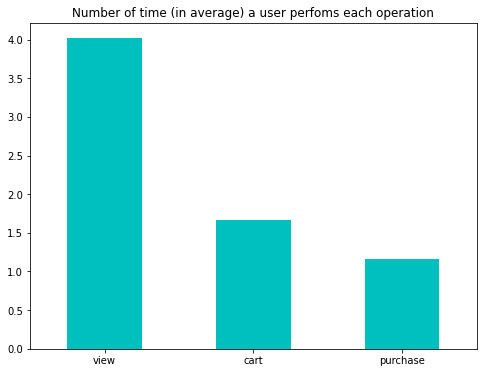

In [9]:
print('\n December 2019 \n')
functions.funnel(datasetDic)
functions.operation(datasetDic)


 January 2020 

The rate of complete funnels is:  1.35 %
Operation that users repeat more on average within a session is:  view


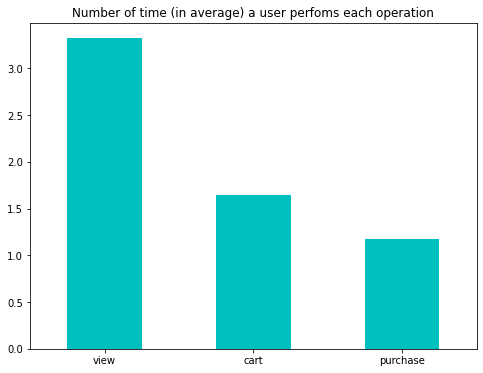

In [10]:
print('\n January 2020 \n')
functions.funnel(datasetGen)
functions.operation(datasetGen)


 February 2020 

The rate of complete funnels is:  6.48 %
Operation that users repeat more on average within a session is:  view


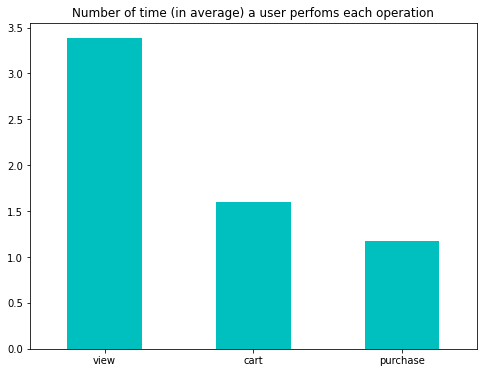

In [11]:
print('\n February 2020 \n')
functions.funnel(datasetFeb)
functions.operation(datasetFeb)


 March 2020 

The rate of complete funnels is:  4.88 %
Operation that users repeat more on average within a session is:  view


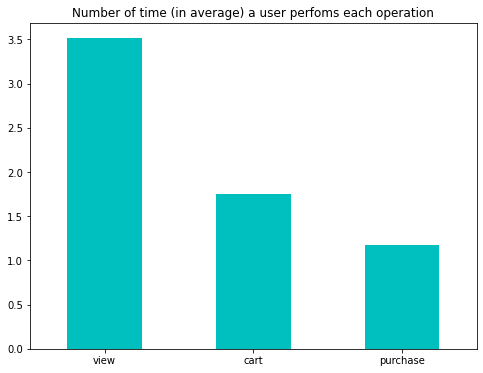

In [12]:
print('\n March 2020 \n')
functions.funnel(datasetMar)
functions.operation(datasetMar)


 April 2020 

The rate of complete funnels is:  9.86 %
Operation that users repeat more on average within a session is:  view


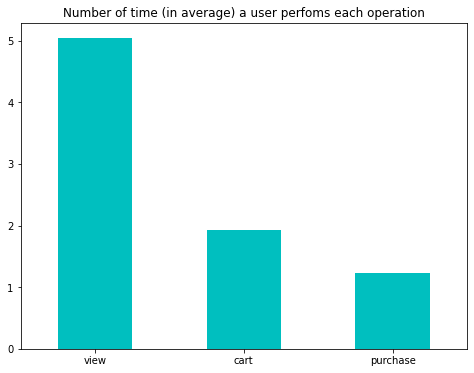

In [13]:
print('\n April 2020 \n')
functions.funnel(datasetApr)
functions.operation(datasetApr)

#### Comment: 
To obtain the complete funnels, we count the number of operations for each user filtered by event type, then we compute the intersection of the results and take the lenght of it. 
For the rate we divide this value for the total number of users and multiply it for 100, in order to have as result the percentage that indicates the rate of the complete funnel. \
As we can see this rate seems to be bigger during the month of November, sales period, instead is smaller in October. \
Each operation that the users repeat within a session is saved into a dictionary where the key is the event type and the value indicates how many times the operation has been done. With this method we can see which operation is repeated more on average returning the key of the maximum value of that dictionary. As we could expect, the most repeated operation on average is 'view'.

* How many times, on average, a user views a product before adding it to the cart?

In [7]:
print('\n October 2019 \n')
functions.view_cart(dataset_Oct)

print('\n November 2019 \n')
functions.view_cart(dataset_Nov)


 October 2019 

The number of times, on average, a user views a product before adding it to the cart is:  5.33

 November 2019 

The number of times, on average, a user views a product before adding it to the cart is:  5.56


In [14]:
print('\n December 2019 \n')
functions.view_cart(datasetDic)


 December 2019 

The number of times, on average, a user views a product before adding it to the cart is:  3.6


In [15]:
print('\n January 2020 \n')
functions.view_cart(datasetGen)


 January 2020 

The number of times, on average, a user views a product before adding it to the cart is:  3.0


In [16]:
print('\n February 2020 \n')
functions.view_cart(datasetFeb)


 February 2020 

The number of times, on average, a user views a product before adding it to the cart is:  3.27


In [17]:
print('\n March 2020 \n')
functions.view_cart(datasetMar)


 March 2020 

The number of times, on average, a user views a product before adding it to the cart is:  3.36


In [18]:
print('\n April 2020 \n')
functions.view_cart(datasetApr)


 April 2020 

The number of times, on average, a user views a product before adding it to the cart is:  3.68


#### Comment: 
To figure out the users who view a product before adding it to the cart we merge (inner join) this dataframe together and we obtain the users that view products and the one who add them to cart. Then we compute the count().mean() on this in order to count the number of times, on average, a user views a product before adding it to the cart. \
As we can see, this value doesn't vary greatly over the months.

* What’s the probability that products added once to the cart are effectively bought?

In [8]:
print('\n October 2019 \n')
functions.prob_cart_bought(dataset_Oct)

print('\n November 2019 \n')
functions.prob_cart_bought(dataset_Nov)


 October 2019 

The probability that products added once to the cart are effectively bought is:  22.0 %

 November 2019 

The probability that products added once to the cart are effectively bought is:  47.0 %


In [19]:
print('\n December 2019 \n')
functions.prob_cart_bought(datasetDic)


 December 2019 

The probability that products added once to the cart are effectively bought is:  63.0 %


In [20]:
print('\n January 2020 \n')
functions.prob_cart_bought(datasetGen)


 January 2020 

The probability that products added once to the cart are effectively bought is:  48.0 %


In [21]:
print('\n February 2020 \n')
functions.prob_cart_bought(datasetFeb)


 February 2020 

The probability that products added once to the cart are effectively bought is:  61.0 %


In [22]:
print('\n March 2020 \n')
functions.prob_cart_bought(datasetMar)


 March 2020 

The probability that products added once to the cart are effectively bought is:  75.0 %


In [23]:
print('\n April 2020 \n')
functions.prob_cart_bought(datasetApr)


 April 2020 

The probability that products added once to the cart are effectively bought is:  58.0 %


#### Comment:
The basic definition of probability is the number of favorable cases over the number of possible cases.
So in order to get the probability that products added once to the cart are effectively bought, we can compute the mean of the total products effectively bought (favorable cases) and divide it by the mean of the total products added once to the cart (possible cases).
The result is an expected value since is realistic that not all products added to the cart are then bought, but we can notice how big is this value in the month of November if we compare it to the month of October. We can suppose that in sale's period (like Black Friday and Cyber Monday in November) the costumers are more inclined to buy than in other period.  

* What’s the average time an item stays in the cart before being removed?


In [24]:
datasetApr.groupby('event_type').event_type.count()

event_type
cart         345
purchase     127
view        9528
Name: event_type, dtype: int64

#### Comment:
Even if for the example just one dataset has been query, if we compute the same operation on each dataset we can see that in none of them the event type **'remove from cart'** is in the list of the event_type, so this operation cannot be done. \
About this type of event we can do some assumption, for example we might assume that the remove from cart is equal to the purchase event, because when a user purchases a product, it is automatically removed from cart. But in this way we are ignoring all the product that have been add to the cart and leter aren't purchased. \
Moreover, the second assumption we can do is to figure out the removed from cart products as difference between purchase and cart events, always assuming that a product that has been remove from cart mandatorily has been bought. \
We didn't want apply either of the two approaches for two reasons: firstly because we thought is wrong ignoring the case that a product isn't no more in cart not because it has been bought but just because the costumer doesn't want it anymore (and it can happen); secondly because even if we decide to compute the second assumption, the code would be basically very similar to the one in the next point.

* How much time passes on average between the first view time and a purchase/addition to cart?

In [3]:
#whole datasets
print('\n October 2019 \n')
functions.avg_time(dataset_Oct)


 October 2019 

Time passes on average between the first view time and a purchase/addition to cart:  1 days 02:48:58.722720


In [3]:
print('\n November 2019 \n')
functions.avg_time(dataset_Nov)


 November 2019 

Time passes on average between the first view time and a purchase/addition to cart:  1 days 02:23:09.497910


In [24]:
#smaller datasets
print('\n December 2019 \n')
functions.avg_time(datasetDic)


 December 2019 

Time passes on average between the first view time and a purchase/addition to cart:  0 days 00:13:06.577977388


In [25]:
print('\n January 2020 \n')
functions.avg_time(datasetGen)


 January 2020 

Time passes on average between the first view time and a purchase/addition to cart:  0 days 00:10:59.163919070


In [26]:
print('\n February 2020 \n')
functions.avg_time(datasetFeb)


 February 2020 

Time passes on average between the first view time and a purchase/addition to cart:  0 days 00:08:55.824576072


In [27]:
print('\n March 2020 \n')
functions.avg_time(datasetMar)


 March 2020 

Time passes on average between the first view time and a purchase/addition to cart:  0 days 00:11:28.658784866


In [28]:
print('\n April 2020 \n')
functions.avg_time(datasetApr)


 April 2020 

Time passes on average between the first view time and a purchase/addition to cart:  0 days 00:13:06.949787710


#### Comment:
We create two new data frame on the two events 'cart' and 'view'. So we compute the merge (inner join) on them in order to obtain a data frame in which there are the list of users who do both operations.
After that, we pick the first element in the list of the timestamps of the view events, because we want only the first element (so the first view). In the end we compute the mean of the time difference between the time of the cart and the time of the view. 
As we can see it has few variations as the months change.

#### [RQ2]:
What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. Plot the most visited subcategories. 
* What are the 10 most sold products per category?


 October 2019 

Most sold products per category:  product_id
1004856    28944
1004767    21806
1004833    12697
1005115    12543
1004870    10615
1002544    10549
1004249     9090
1004836     7691
1005105     7293
1002524     6633
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056    12381
4804295     3567
4804055     3410
4803977     1441
4802036      806
4804409      555
4803399      381
4802159      348
4804572      343
4803878      323
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801690    2745
1801766    1561
1801881    1264
1801739     944
1801860     779
1801805     683
1801929     662
1801882     591
1801995     494
1801623     477
Name: product_id, dtype: int64
Most sold products per category:  product_id
5100337    1310
5100566     950
5100562     856
5100572     789
5100855     706
5100577     705
5100563     569
5100376     565
5100719     429
5100576     365
Name: product_id, dtype: int64
Most sold products 

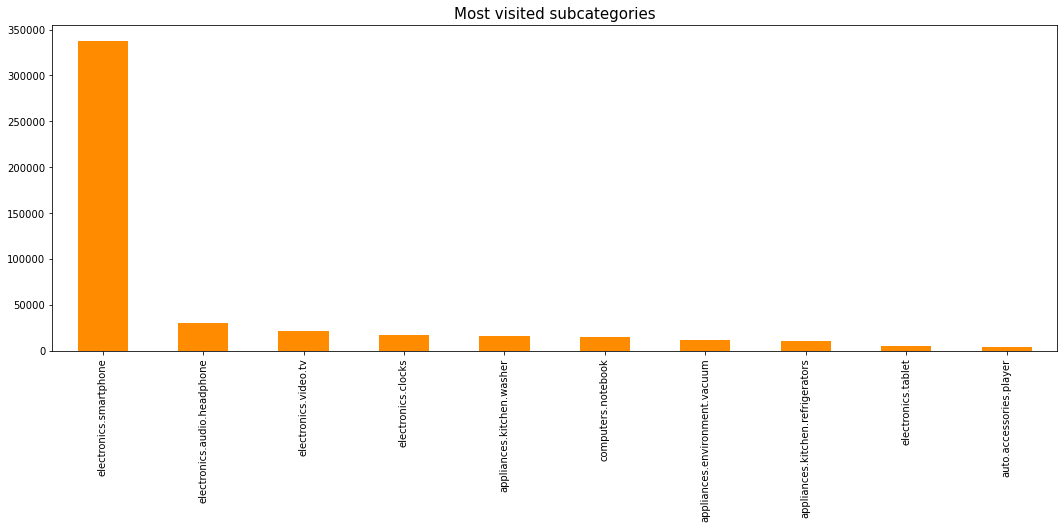

In [9]:
print('\n October 2019 \n')
functions.trend_categories(dataset_Oct)


 November 2019 

Most sold products per category:  product_id
1004856    32321
1004767    22613
1005115    22244
1004833    13486
1002544    11678
1004870    10673
1005100    10132
1004249     8881
1005105     8483
1004836     7858
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056    17800
4804055     3776
4804295     3162
4804718     2501
4803977     1892
4804660     1249
4804572      700
4802036      502
4804409      373
4803399      323
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801690    3086
1801766    2238
1801881    1548
1801805    1416
1801929    1183
1801739    1080
1801940     817
1801623     705
1801849     693
1801995     598
Name: product_id, dtype: int64
Most sold products per category:  product_id
5100855    1295
5100566     998
5100337     994
5100562     930
5100610     777
5100577     749
5100572     728
5100719     626
5100376     566
5100852     515
Name: product_id, dtype: int64
Most sold products

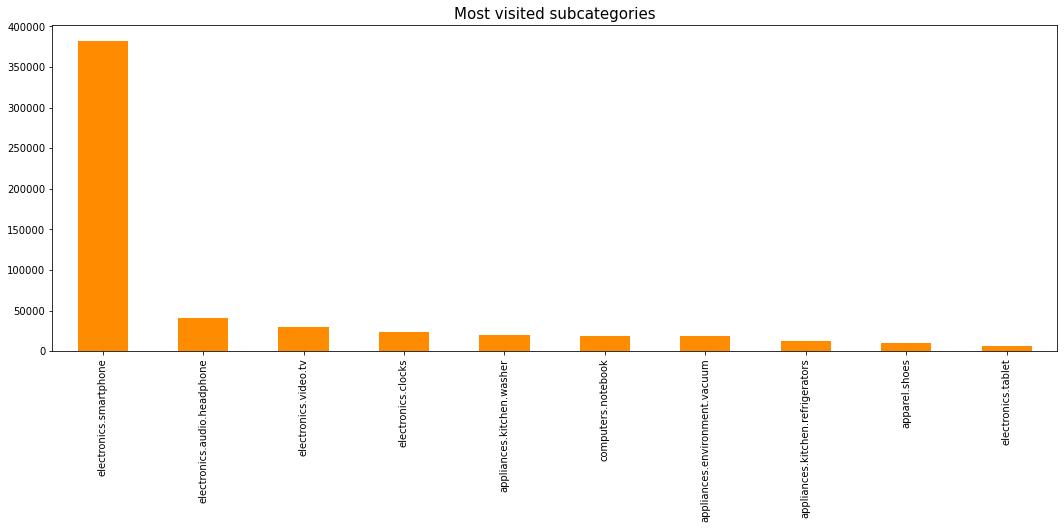

In [10]:
print('\n November 2019 \n')
functions.trend_categories(dataset_Nov)


 December 2019 

Most sold products per category:  product_id
1004856    688
1004767    539
1005115    444
1005100    313
1004833    282
1002544    253
1004870    201
1005160    195
1005105    165
1004873    156
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056    309
4804295     82
4804055     67
4804718     51
4803977     47
4804660     27
4803879      9
4803771      8
4801876      7
4803976      7
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801690    63
1801766    42
1801881    36
1801940    32
1801805    29
1802038    25
1801995    21
1801704    19
1801929    19
1801739    15
Name: product_id, dtype: int64
Most sold products per category:  product_id
4100346     134
5100816     123
4100129      19
6000094      17
4100277      11
5301399       9
56700004      9
9300000       9
5100503       8
9300012       7
Name: product_id, dtype: int64
Most sold products per category:  product_id
1005174      102
1005186       40

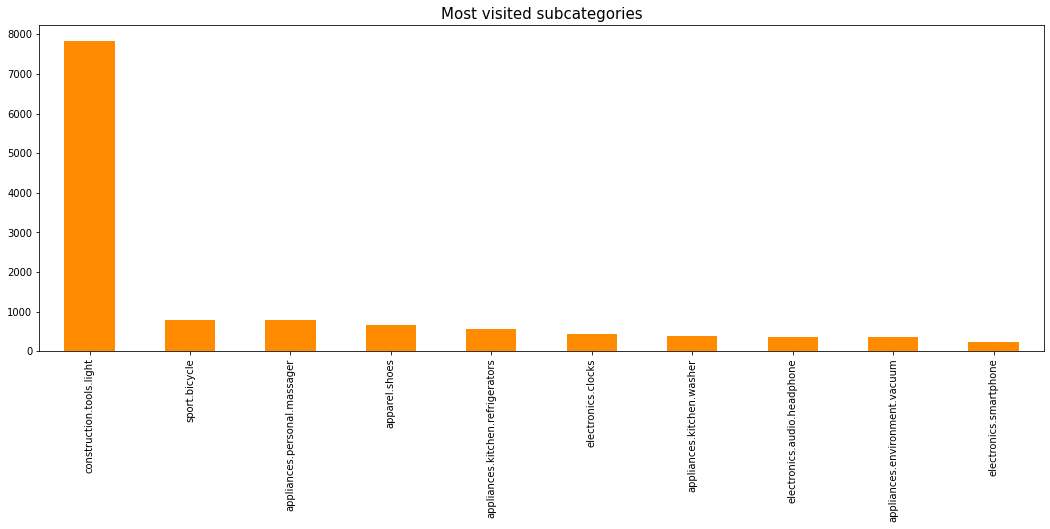

In [51]:
print('\n December 2019 \n')
functions.trend_categories(datasetDic)


 January 2020 

Most sold products per category:  product_id
1004767    168
1004856     91
1005115     89
1005212     72
1002544     68
1005100     60
1005105     59
1004249     49
1004873     48
1005160     48
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056      66
4804718      20
4804660      18
4804055      12
4804295      10
4803977       9
4804409       4
4803976       3
100036138     3
4802273       2
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801881    13
1801690    13
1801766    12
1801940    11
1802037     9
1802005     8
1801689     7
1801805     4
1801739     4
1802033     4
Name: product_id, dtype: int64
Most sold products per category:  product_id
5100855      8
5100562      7
5100610      5
5100689      4
5100577      4
100015364    3
21400636     3
5100376      3
1480790      2
5100874      2
Name: product_id, dtype: int64
Most sold products per category:  product_id
4100346      25
5100816      22
10

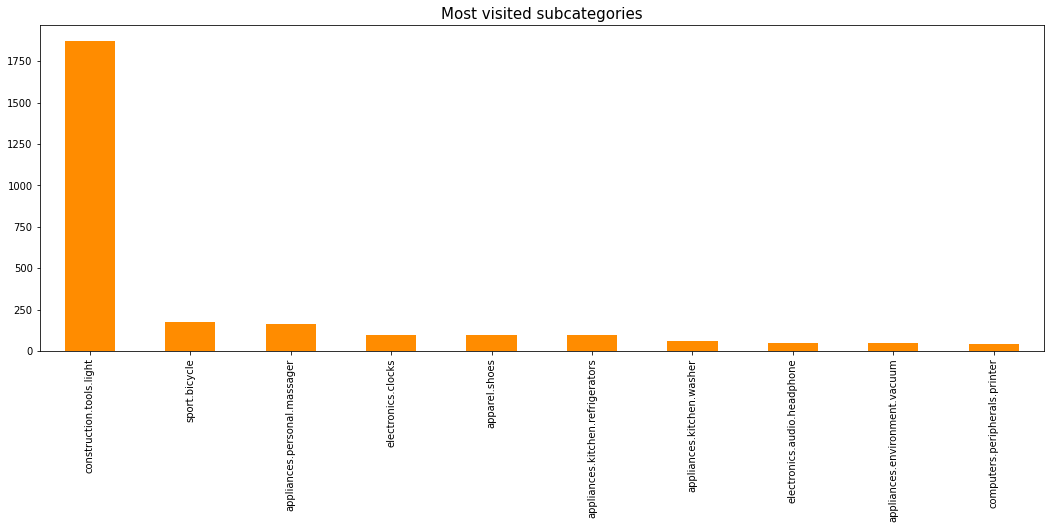

In [52]:
print('\n January 2020 \n')
functions.trend_categories(datasetGen)


 February 2020 

Most sold products per category:  product_id
1004767      733
1005115      514
1005100      504
1005212      291
1002544      260
1005160      237
1004856      171
1005105      155
1004873      142
100068488    128
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056      296
4804055       84
4804295       69
4804718       68
4804660       45
4803977       32
4803976       11
4801876        7
100055862      7
100036138      6
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801690    57
1801881    35
1801766    34
1801940    22
1802005    18
1802104    13
1801806    11
1802038    11
1801995    11
1801704    11
Name: product_id, dtype: int64
Most sold products per category:  product_id
5100816      125
4100346       25
5100503       14
4100126       13
100066114      9
56700004       8
6000094        7
100057088      7
100005955      6
9300112        5
Name: product_id, dtype: int64
Most sold products per categ

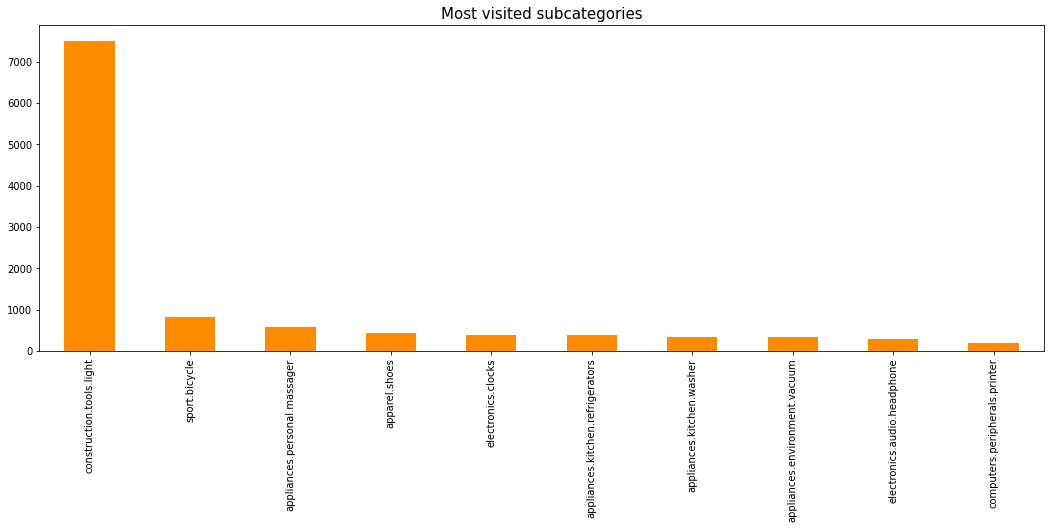

In [53]:
print('\n February 2020 \n')
functions.trend_categories(datasetFeb)


 March 2020 

Most sold products per category:  product_id
1004767      603
1005115      485
1005100      476
1005212      383
1002544      346
1005160      322
100068488    306
1004856      267
1005169      230
1005105      219
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056    307
4804055     99
4804718     72
4804660     71
4803977     62
4804295     46
4803976     11
4802401     10
4802159     10
4804409     10
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801766    41
1801690    40
1801940    24
1801881    21
1801739    14
1801849    13
1801806    12
1801636    11
1802005    10
1801995    10
Name: product_id, dtype: int64
Most sold products per category:  product_id
5100816      159
4100346       17
4100126       16
5100503       15
9300067       12
53300010      11
100066114      8
4100129        7
56700004       6
6000094        6
Name: product_id, dtype: int64
Most sold products per category:  product_id
510085

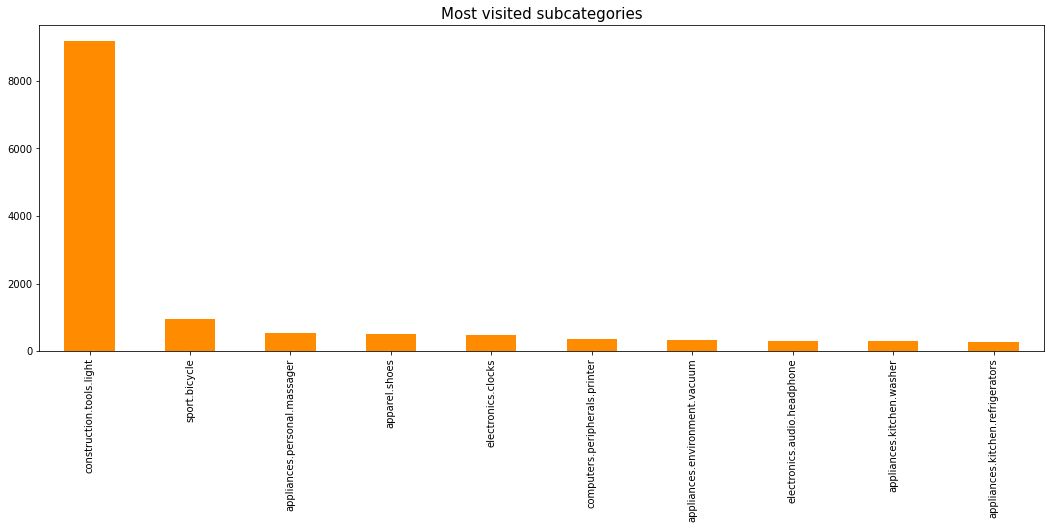

In [54]:
print('\n March 2020 \n')
functions.trend_categories(datasetMar)


 April 2020 

Most sold products per category:  product_id
1005100      629
1005212      520
100068488    362
1004856      353
1004836      266
1002544      254
100068493    251
1004838      207
1005160      203
1005115      199
Name: product_id, dtype: int64
Most sold products per category:  product_id
100011103    219
100120437    164
100170834    148
100104755    128
100022253     82
1307545       56
1307566       53
1307067       52
100023514     51
100104481     49
Name: product_id, dtype: int64
Most sold products per category:  product_id
1801881    52
1801690    51
1801766    44
1801940    36
1802005    29
1801503    26
1801806    23
1801906    20
1801739    18
1802061    18
Name: product_id, dtype: int64
Most sold products per category:  product_id
4804056      146
4804660       43
4804055       43
4804718       36
4803977       36
4804295       29
4802963       14
4803399       12
100125664     11
4802159        9
Name: product_id, dtype: int64
Most sold products per category

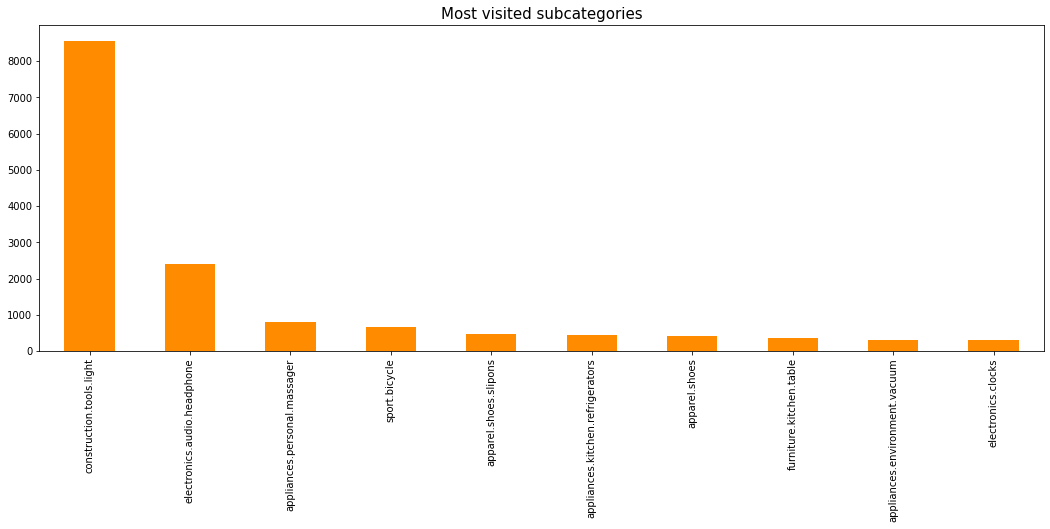

In [55]:
print('\n April 2020 \n')
functions.trend_categories(datasetApr)

#### Comment:
To find out which are the categories with the most trending products overall, we filter the dataset for the purchase product and group it by the category to visualize how many items are been sold for each category and also to count the values. 
For each category in this data frame (converted in a list) we filter the category_set for the categories in the dataframe where there are the item sold, we group it by the product and we sort all the values in ascending order. In that way we pick the first 10 elements that indicate what are the 10 most sold products per category. 
Generally speaking, the products belonging to the construction and electonics categories are the best-selling one.

#### [RG3]:
For each category, what’s the brand whose prices are higher on average?
Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

October 2019 

Brands in ascending order in category: brand
apple         889.063293
oneplus       689.737171
google        602.701852
umi           527.574074
sony          339.105162
blackberry    338.903750
lg            306.832091
samsung       261.129673
honor         247.720270
vivo          244.779556
oppo          221.555391
asus          219.347500
huawei        214.916896
xiaomi        207.854606
nokia         163.461719
nubia         154.010000
meizu         125.933909
doogee        119.497303
texet         115.769375
tp-link       108.523627
tecno         103.926000
htc           102.940000
gionee         92.839091
micromax       84.850000
haier          84.445435
philips        82.370000
zte            78.750694
irbis          72.130000
bq             63.714674
jinga          63.583953
prestigio      55.169338
inoi           51.916410
fly            45.969130
Name: price, dtype: float64
The brand with the highest average price in appliances.environment.water_heater is: gre

The brand with the highest average price in appliances.kitchen.coffee_grinder is: delonghi
The brand with the highest average price in computers.components.cooler is: nzxt
The brand with the highest average price in apparel.shirt is: harley-davidson
The brand with the highest average price in sport.tennis is: wilson
The brand with the highest average price in auto.accessories.parktronic is: incar
The brand with the highest average price in construction.tools.light is: metabo
The brand with the highest average price in apparel.scarf is: fabretti
The brand with the highest average price in apparel.tshirt is: weekend
The brand with the highest average price in appliances.personal.scales is: garmin
The brand with the highest average price in furniture.bedroom.blanket is: askona
The brand with the highest average price in furniture.universal.light is: aldit
The brand with the highest average price in appliances.kitchen.juicer is: smeg
The brand with the highest average price in apparel.shoe

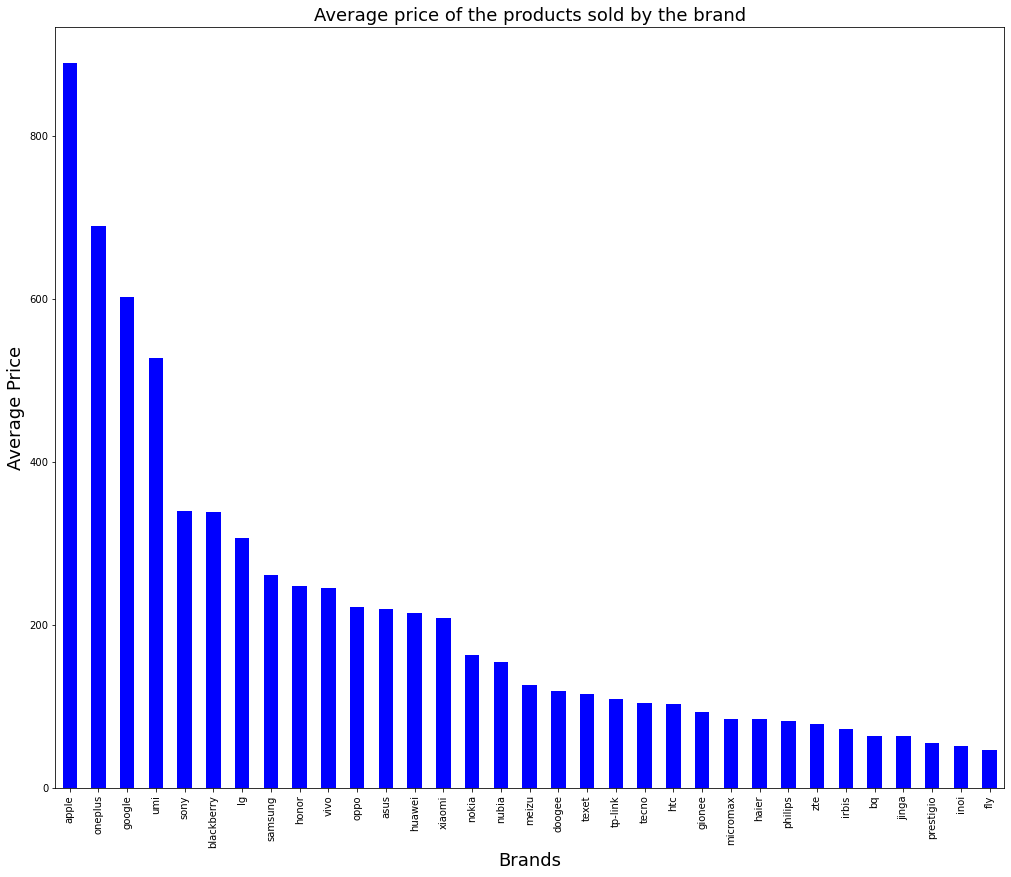

In [4]:
print('October 2019 \n')
functions.avg_prod('electronics.smartphone',dataset_Oct.dropna())

November 2019 

Brands in ascending order in category: brand
microsoft    1114.439130
apple         616.248017
xiaomi        290.867000
xp-pen        276.862667
wacom         250.132745
samsung       178.026216
huawei        163.515052
lenovo        153.218693
huion         143.468529
acer          121.399429
irbis          83.992308
navitel        79.323333
bq             68.992304
prestigio      65.550023
genius         57.226667
trust          56.873333
nexttab        50.916901
Name: price, dtype: float64
The brand with the highest average price in electronics.smartphone is: apple
The brand with the highest average price in appliances.sewing_machine is: babylock
The brand with the highest average price in appliances.kitchen.washer is: siemens
The brand with the highest average price in computers.notebook is: dreammachines
The brand with the highest average price in appliances.kitchen.dishwasher is: smeg
The brand with the highest average price in furniture.kitchen.chair is: micuna
T

The brand with the highest average price in computers.ebooks is: amazon
The brand with the highest average price in country_yard.cultivator is: viking
The brand with the highest average price in appliances.kitchen.coffee_grinder is: delonghi
The brand with the highest average price in furniture.universal.light is: preciosa
The brand with the highest average price in sport.ski is: kessler
The brand with the highest average price in apparel.shoes.slipons is: vans
The brand with the highest average price in apparel.scarf is: fabretti
The brand with the highest average price in apparel.jeans is: weekend
The brand with the highest average price in furniture.bedroom.blanket is: askona
The brand with the highest average price in accessories.umbrella is: hoco
The brand with the highest average price in kids.swing is: obi
The brand with the highest average price in auto.accessories.anti_freeze is: ravenol
The brand with the highest average price in electronics.camera.photo is: tamron
The brand 

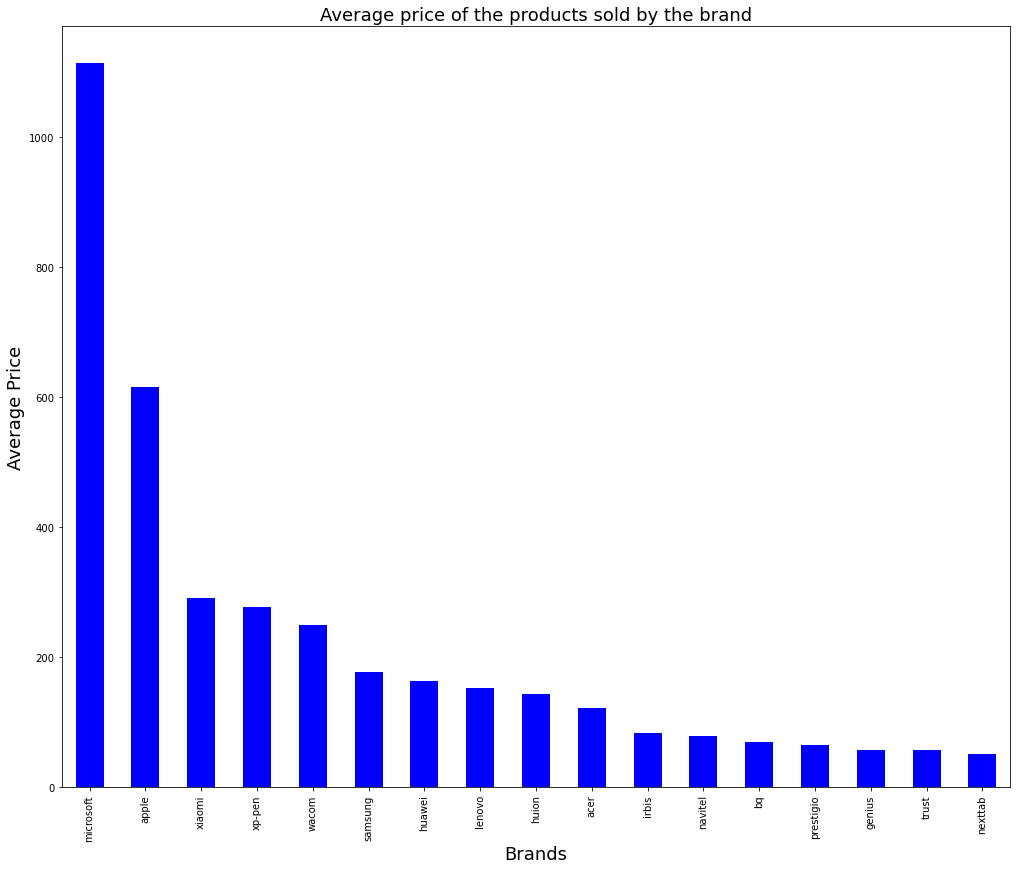

In [5]:
print('November 2019 \n')
functions.avg_prod('electronics.tablet',dataset_Nov.dropna())

#### Comment:
The function avg_prod() takes in input a specific category and the dataset. This dataset is filtered by the event type 'purchase' and the category passed as input, then it's grouped by the brand and we compute the price.mean() on it. We plot this new data frame that indicates the average price of the products sold by the brand. \
Then, for each category in the dataset, we save in another groupby data frame the same information but without filtering the input dataset with the event type 'purchase'. We sort the values ordered in ascending order so we can print them and also pick the value with maximum id (so the first element in the dataframe) to visualize the brand whose prices are higher on average. We can notice that the brands of electonics product, on average, have higher prices.

#### [RQ4]:
How much does each brand earn per month? \
Write a function that given the name of a brand in input returns, for each month, its profit. \
Is the average price of products of different brands significantly different? \
Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [6]:
#working with the full datasets
print('October & November \n')
functions.incomes(dataset_Oct,dataset_Nov)

October & November 

Month1 average price max distance: 2392.2009790209795
Month2 average price max distance: 2572.840000000028
Brands and their losses: 
 ('lysvenskieemali', 100.0) ('doubleeagle', 100.0) ('coolermaster', 100.0)


#### Comment:
For this exercise, only the comparision between October and November on the full dataset is computed. 
We define the function that takes as inputs the brand name and the dataset that we are going to filter on the specified brand and the event type 'purchase'. \
On this new dataset we compute the sum of the price of the sales products in order to visualize how much does each brand earn. \
So, thanks to this, we see the incomes for each brand (not repeated) in the dataset, and compute the average price of products belonging to different brand. \
We invoke our function on the dataset of two sequential months and append to a dictionary the value of the difference for each month. \
After this the dictionary will be sorted and we can extract the first 3 elements that represent the top 3 brands that have suffered the biggest losses in earnings.
To visualize if the average price of products of different brands are significantly different or not, we calculate the average of the incomes and from this list we pick the maximun and the minimum values. The result we obtain by the difference from this two values indicates the losses in earning of that brands between a month and the next. 

#### [RG5]:
In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. \
Create a plot that for each day of the week show the hourly average of visitors your store has.


 October 2019 

In this hour there are more visits on the e-commerce: 16


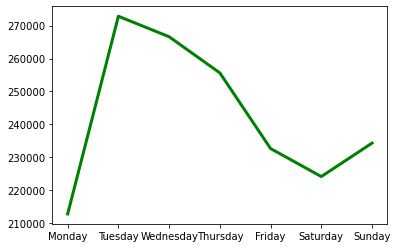

In [6]:
print('\n October 2019 \n')
functions.h_avg(dataset_Oct)


 November 2019 

In this hour there are more visits on the e-commerce: 16


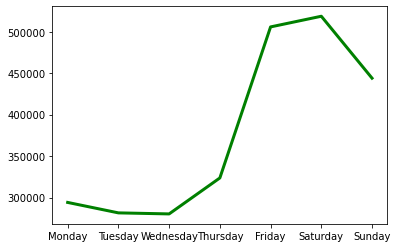

In [4]:
print('\n November 2019 \n')
functions.h_avg(dataset_Nov)


 December 2019 

In this hour there are more visits on the e-commerce: 7


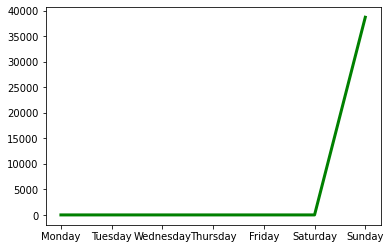

In [36]:
print('\n December 2019 \n')
functions.h_avg(datasetDic)


 January 2020 

In this hour there are more visits on the e-commerce: 14


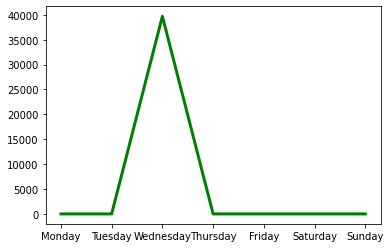

In [37]:
print('\n January 2020 \n')
functions.h_avg(datasetGen)


 February 2020 

In this hour there are more visits on the e-commerce: 9


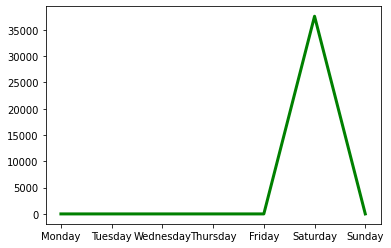

In [38]:
print('\n February 2020 \n')
functions.h_avg(datasetFeb)


 March 2020 

In this hour there are more visits on the e-commerce: 11


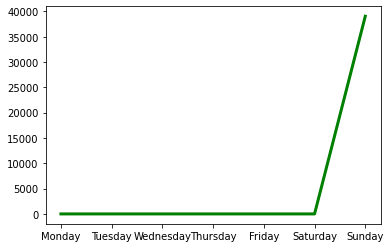

In [39]:
print('\n March 2020 \n')
functions.h_avg(datasetMar)


 April 2020 

In this hour there are more visits on the e-commerce: 8


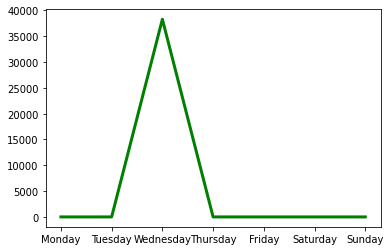

In [40]:
print('\n April 2020 \n')
functions.h_avg(datasetApr)

#### Comment:
A way to discover in what part of the day the e-commerce is more visited, is to create a data frame filtered by the event type 'view' and grouped by the event time hour. We can compute the count() of the values in this new data frame and sort them in descending order. To pick the most visited hour, we select the first index of the dataset.
Furthermore we are looking for which days customers are likely to visit the e-commerce. So we can iterate for 7 times (like the days of the week are) and in each iteration we use the function *event_time.dt.dayofweek* (to compute the hourly_average on days of week) on the dataset filtered by event type equal to 'view'. \
Then we create a plot that shows for each day of the week, the hourly average of visitors the e-commerce has. 
As we can see from the plots of November, during the weekend there are more constumers on line than during the work days. Maybe it can depends on the fact that people has more free time in days like Saturday or Sunday.
An idea to take advantages of this information and so improve the business strategies of the e-commerce, is to put more advertisements during these days. A value that we didn't expect is the hour on which the store is most visited, because it's the same in the two datasets.

#### [RQ6]:
The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
Find the overall conversion rate of your store.
Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.


 October 2019 

The overall conversion rate is: 1.821628121591493 %
Conversion rate of each category: 
 category_code
electronics.smartphone          0.031830
electronics.audio.headphone     0.029948
electronics.video.tv            0.020422
electronics.clocks              0.014068
appliances.kitchen.washer       0.019425
                                  ...   
apparel.skirt                   0.003902
apparel.shorts                  0.003175
apparel.jumper                  0.000751
apparel.jacket                  0.002299
construction.tools.soldering    0.001585
Name: conversion_rate, Length: 121, dtype: float64


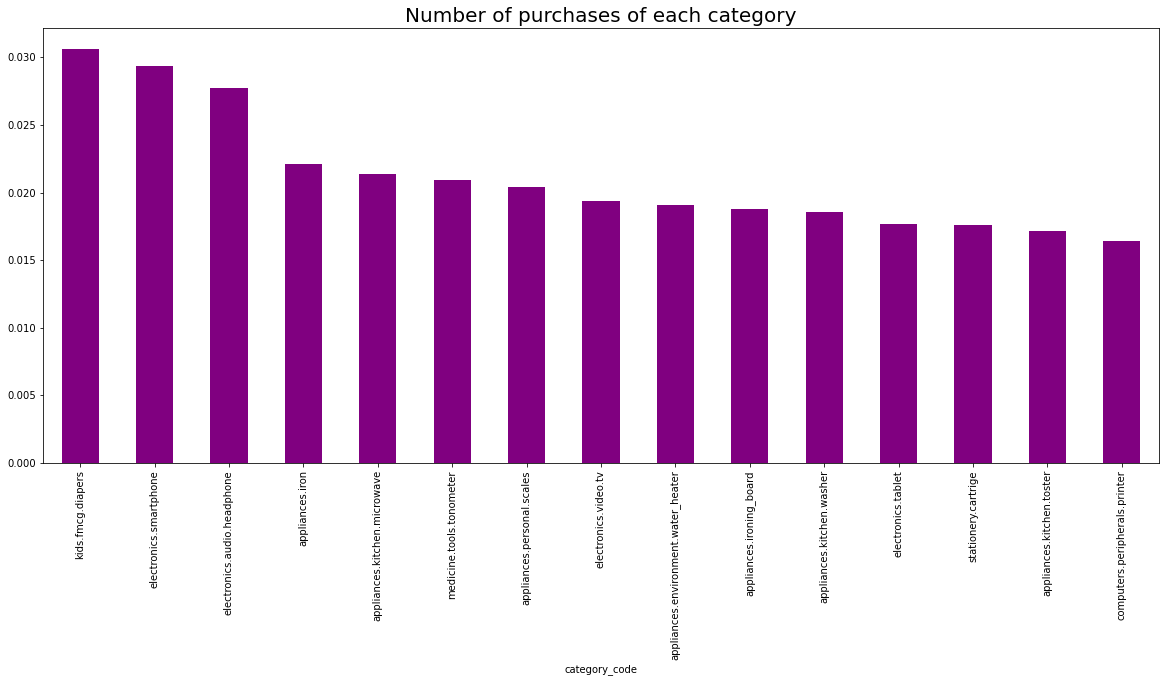

In [14]:
print('\n October 2019 \n')
functions.overall_conversion_rate(dataset_Oct)
functions.categories(dataset_Oct)


 November 2019 

The overall conversion rate is: 1.442723602813325 %
Conversion rate of each category: 
 category_code
electronics.smartphone           0.025798
electronics.audio.headphone      0.024824
electronics.video.tv             0.014616
electronics.clocks               0.011651
appliances.kitchen.washer        0.015049
                                   ...   
construction.tools.soldering     0.001724
country_yard.furniture.hammok    0.002553
apparel.shorts                   0.003130
appliances.kitchen.fryer         0.010101
construction.tools.screw         0.005495
Name: conversion_rate, Length: 126, dtype: float64


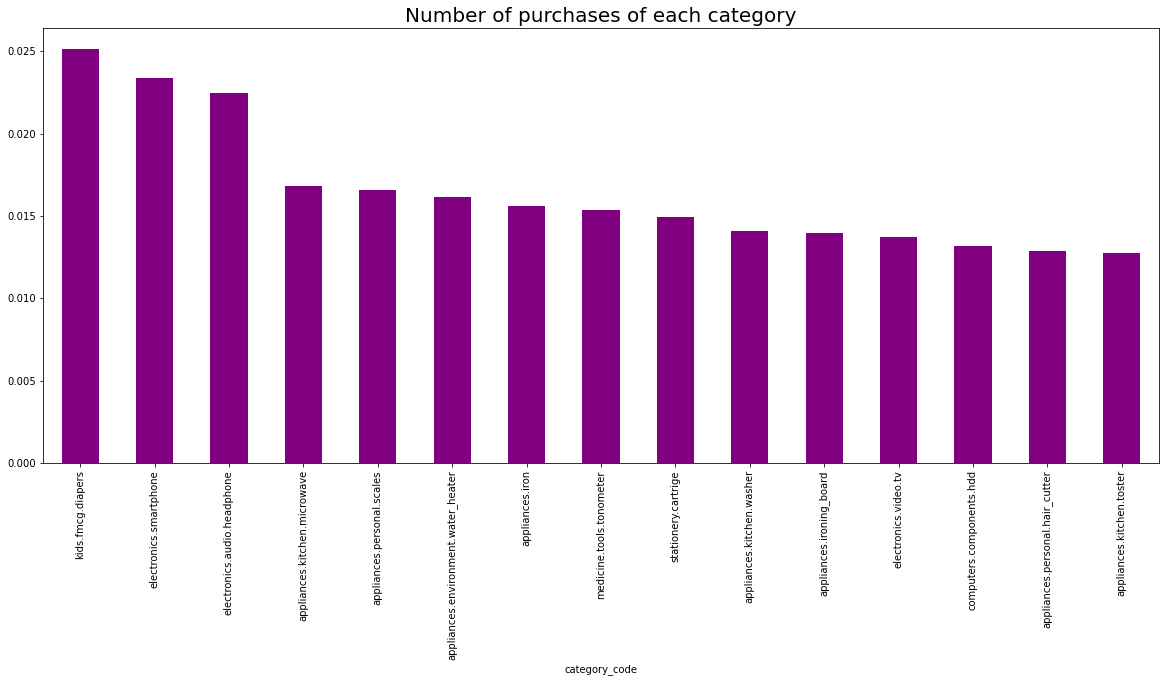

In [15]:
print('\n November 2019 \n')
functions.overall_conversion_rate(dataset_Nov)
functions.categories(dataset_Nov)


 December 2019 

The overall conversion rate is: 1.9721828843430453 %
Conversion rate of each category: 
 category_code
construction.tools.light            0.035358
sport.bicycle                       0.026899
appliances.personal.massager        0.020568
apparel.shoes                       0.016032
appliances.kitchen.refrigerators    0.016185
                                      ...   
computers.peripherals.camera        0.007576
computers.components.sound_card     0.015625
computers.components.motherboard    0.002786
auto.accessories.parktronic         0.005376
computers.components.hdd            0.004785
Name: conversion_rate, Length: 128, dtype: float64


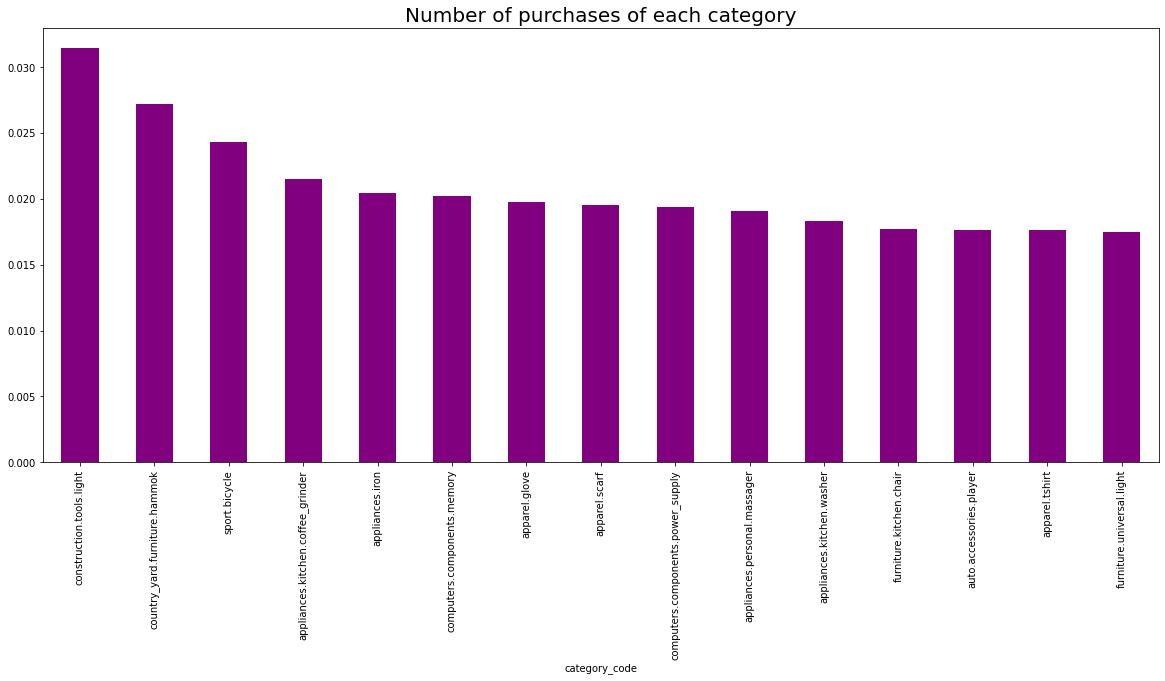

In [41]:
print('\n December 2019 \n')
functions.overall_conversion_rate(datasetDic)
functions.categories(datasetDic)


 January 2020 

The overall conversion rate is: 0.3749274849960818 %
Conversion rate of each category: 
 category_code
construction.tools.light                  0.006853
sport.bicycle                             0.004393
appliances.personal.massager              0.004698
electronics.clocks                        0.002704
apparel.shoes                             0.003178
                                            ...   
apparel.tshirt                            0.000675
appliances.environment.air_conditioner    0.000820
appliances.personal.hair_cutter           0.000803
country_yard.furniture.hammok             0.001980
appliances.kitchen.hob                    0.000595
Name: conversion_rate, Length: 91, dtype: float64


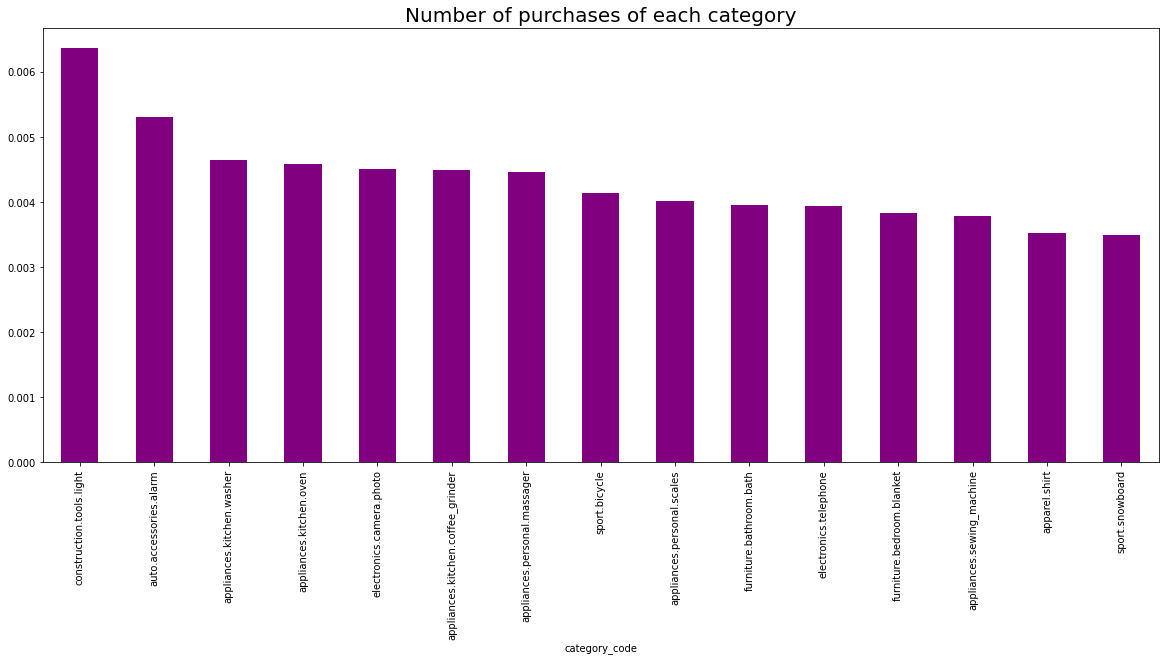

In [42]:
print('\n January 2020 \n')
functions.overall_conversion_rate(datasetGen)
functions.categories(datasetGen)


 February 2020 

The overall conversion rate is: 1.7822420975848776 %
Conversion rate of each category: 
 category_code
construction.tools.light          0.034490
sport.bicycle                     0.024387
appliances.personal.massager      0.020651
apparel.shoes                     0.014582
electronics.clocks                0.014383
                                    ...   
auto.accessories.videoregister    0.004348
computers.components.cpu          0.009009
computers.peripherals.camera      0.005051
construction.tools.soldering      0.012500
country_yard.lawn_mower           0.002551
Name: conversion_rate, Length: 116, dtype: float64


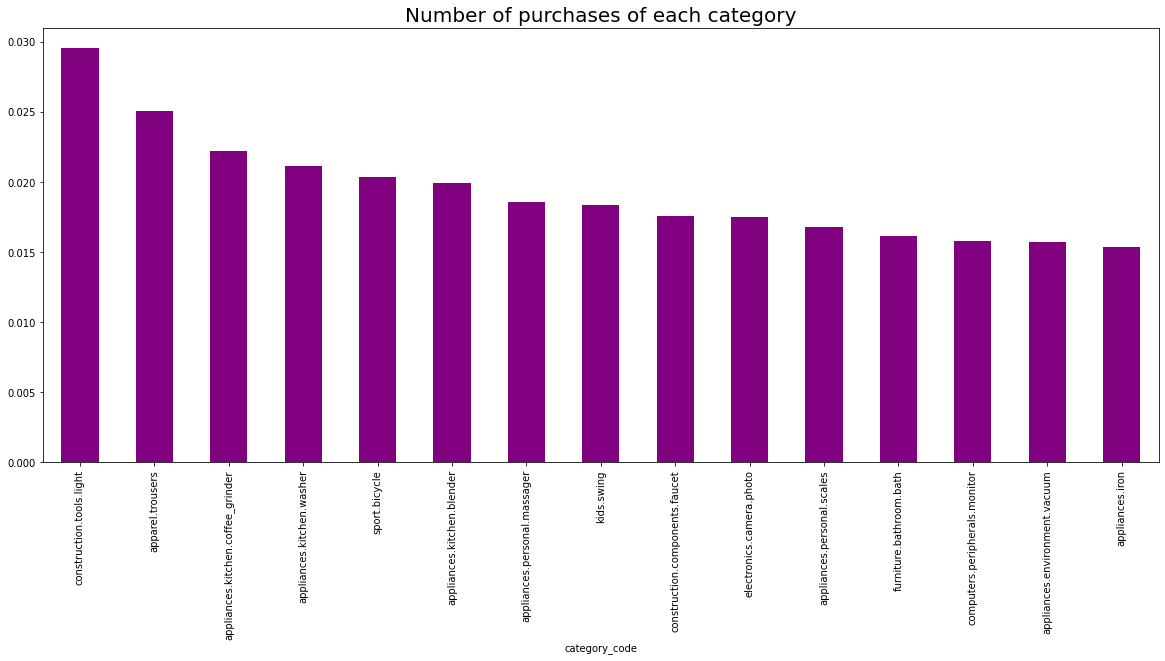

In [43]:
print('\n February 2020 \n')
functions.overall_conversion_rate(datasetFeb)
functions.categories(datasetFeb)


 March 2020 

The overall conversion rate is: 2.008627158791173 %
Conversion rate of each category: 
 category_code
construction.tools.light               0.037681
sport.bicycle                          0.030240
appliances.personal.massager           0.019246
apparel.shoes                          0.019862
electronics.clocks                     0.015863
                                         ...   
construction.tools.screw               0.008197
computers.components.videocards        0.002755
computers.peripherals.camera           0.004484
appliances.environment.water_heater    0.100000
kids.fmcg.diapers                      0.003597
Name: conversion_rate, Length: 114, dtype: float64


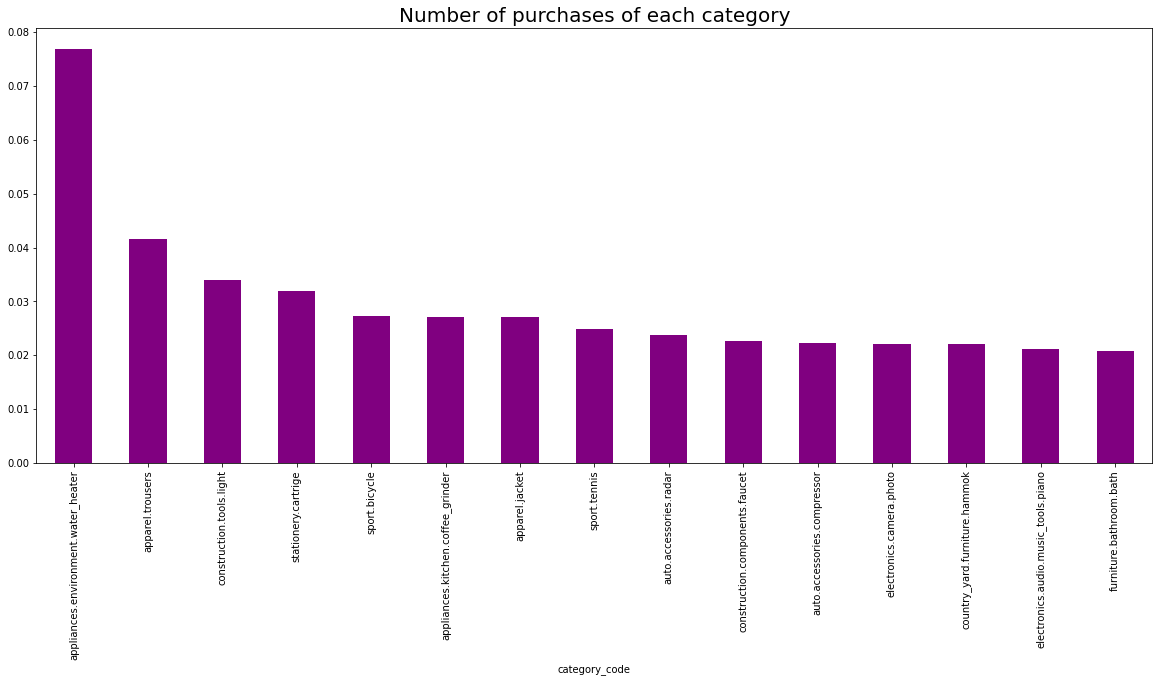

In [44]:
print('\n March 2020 \n')
functions.overall_conversion_rate(datasetMar)
functions.categories(datasetMar)


 April 2020 

The overall conversion rate is: 2.2025615943844485 %
Conversion rate of each category: 
 category_code
construction.tools.light          0.041154
electronics.audio.headphone       0.017975
appliances.personal.massager      0.023490
sport.bicycle                     0.024452
apparel.shoes.slipons             0.020241
                                    ...   
medicine.tools.tonometer          0.003401
apparel.glove                     0.003125
auto.accessories.videoregister    0.002132
auto.accessories.player           0.031250
appliances.iron                   0.052632
Name: conversion_rate, Length: 113, dtype: float64


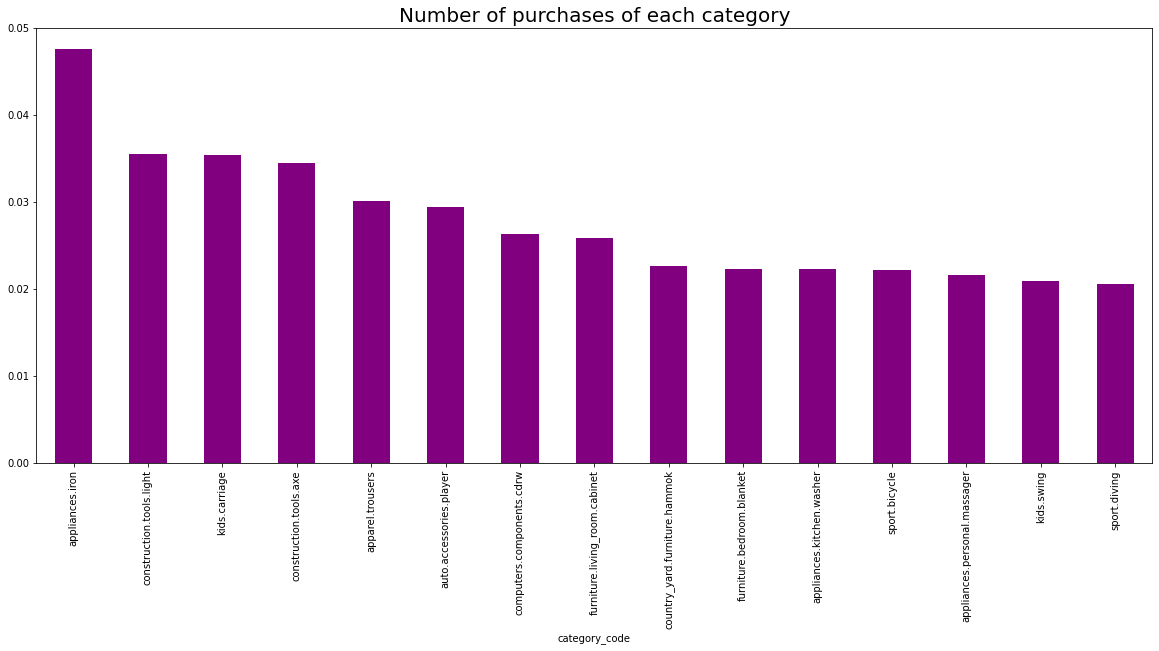

In [45]:
print('\n April 2020 \n')
functions.overall_conversion_rate(datasetApr)
functions.categories(datasetApr)

#### Comment:
To calculate the conversation rate we divide the number of conversions we get by the total number of people who visited the e-commerce. So we create a dataset filtered by the 'purchase' event type that represents our conversions, a dataset filtered by the 'view' event type that is the number of total interaction with the e-commerce, of both we count their items and compute the average values and then we divide them *(purchases/ views)*. \
Furthermore, for the conversion rate of each category, the difference is that both dataframes we divide are filtered by the category code. \
The conversion rate is subject to many factors, for examples: range of products, prices and season. We didn't expect that in November this value is lower than in October. That's might be because in that period the constumers pass more time on the e-commerce, scrolling the pages to visualize more products because of the sales, the first gifts for the incoming Christams and so on. 

#### [RQ7]:
The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers. \
Prove that the pareto principle applies to your store.


 October 2019 



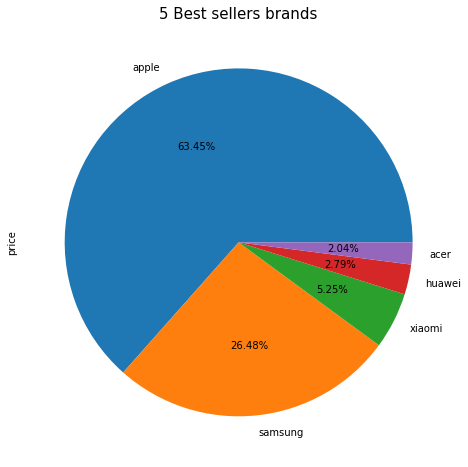

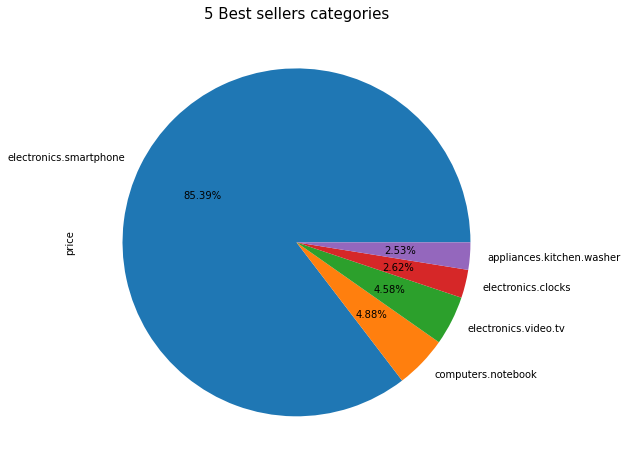

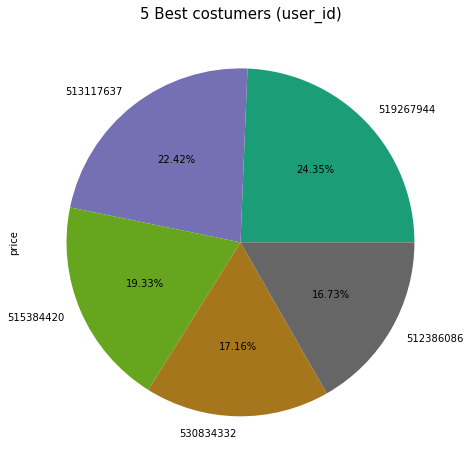

In [16]:
print('\n October 2019 \n')
functions.pareto_brand(dataset_Oct)
functions.pareto_category(dataset_Oct)
functions.pareto_user(dataset_Oct)


 November 2019 



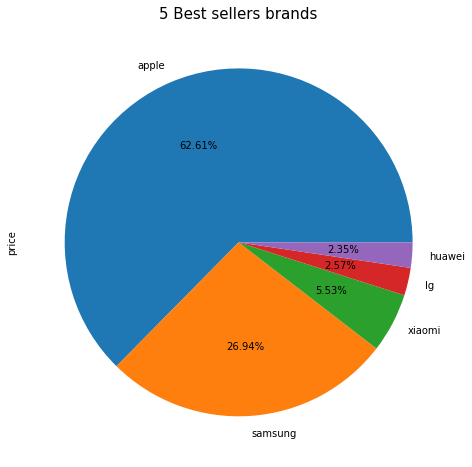

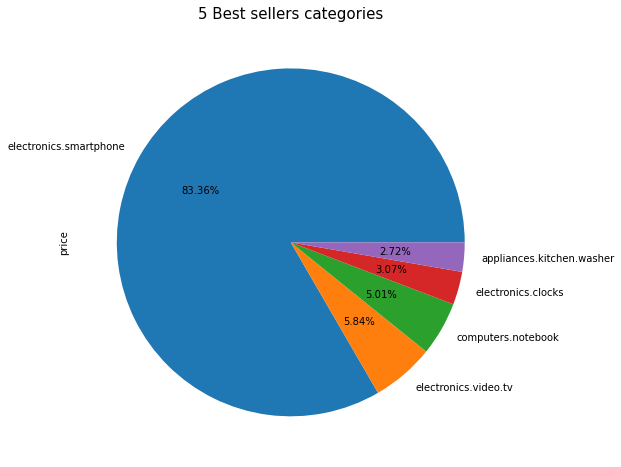

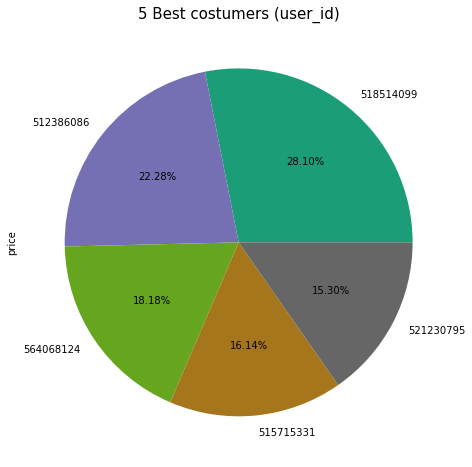

In [17]:
print('\n November 2019 \n')
functions.pareto_brand(dataset_Nov)
functions.pareto_category(dataset_Nov)
functions.pareto_user(dataset_Nov)


 December 2019 



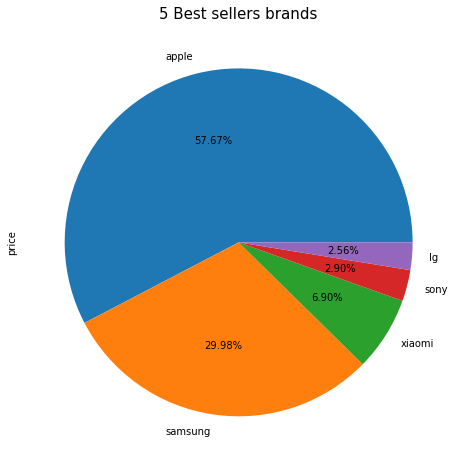

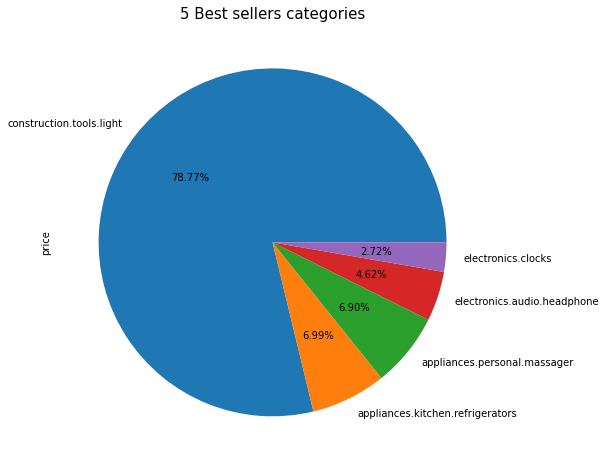

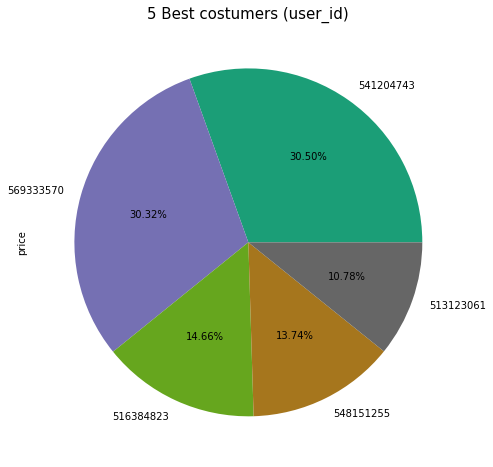

In [46]:
print('\n December 2019 \n')
functions.pareto_brand(datasetDic)
functions.pareto_category(datasetDic)
functions.pareto_user(datasetDic)


 January 2020 



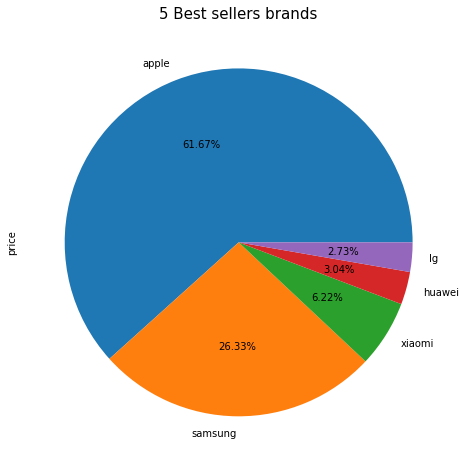

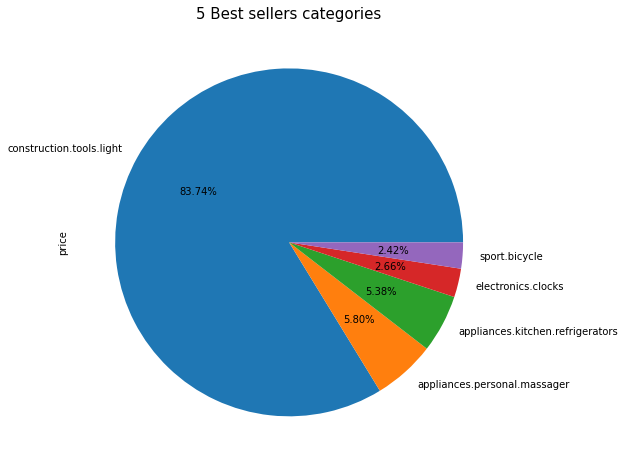

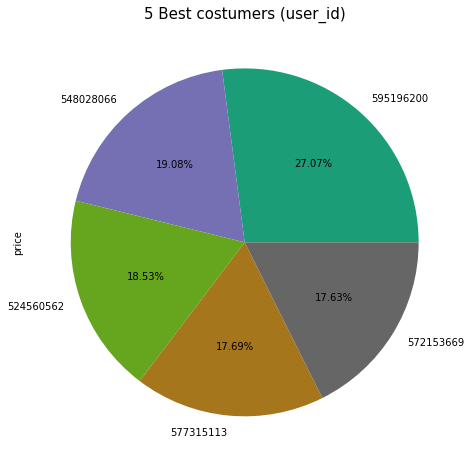

In [47]:
print('\n January 2020 \n')
functions.pareto_brand(datasetGen)
functions.pareto_category(datasetGen)
functions.pareto_user(datasetGen)


 February 2020 



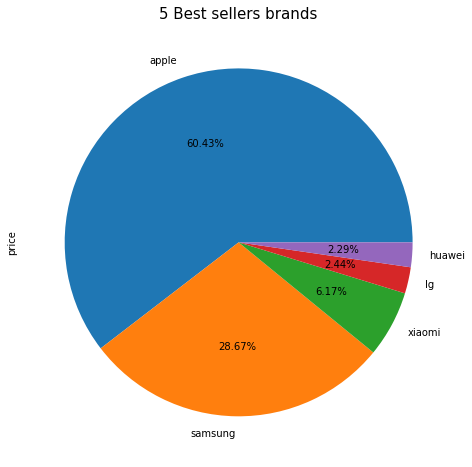

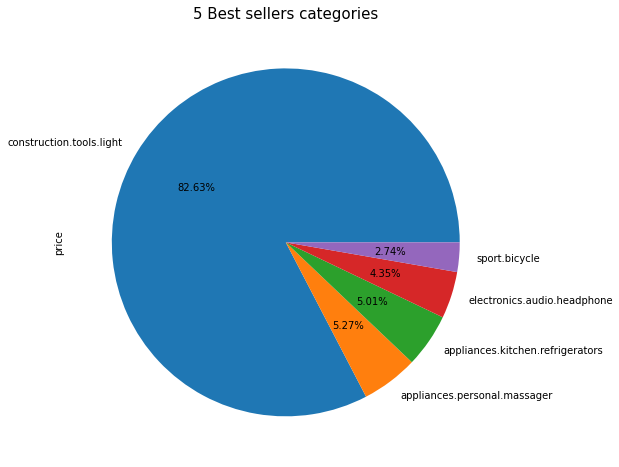

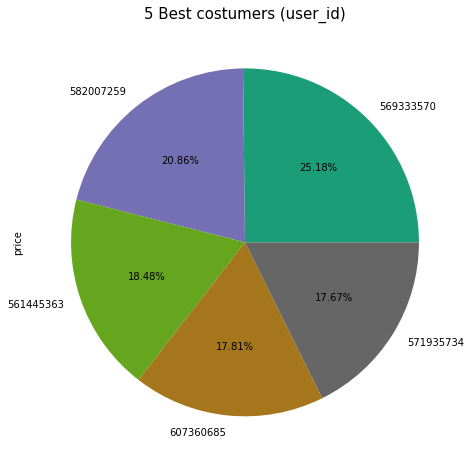

In [48]:
print('\n February 2020 \n')
functions.pareto_brand(datasetFeb)
functions.pareto_category(datasetFeb)
functions.pareto_user(datasetFeb)


 March 2020 



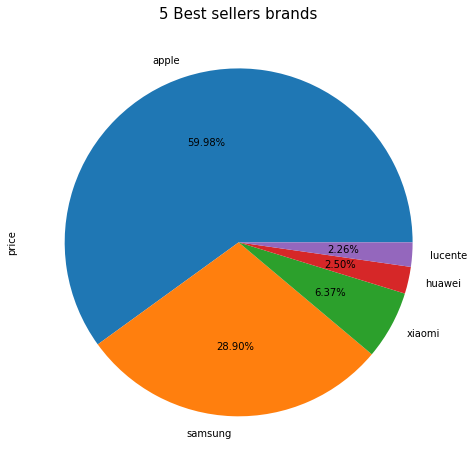

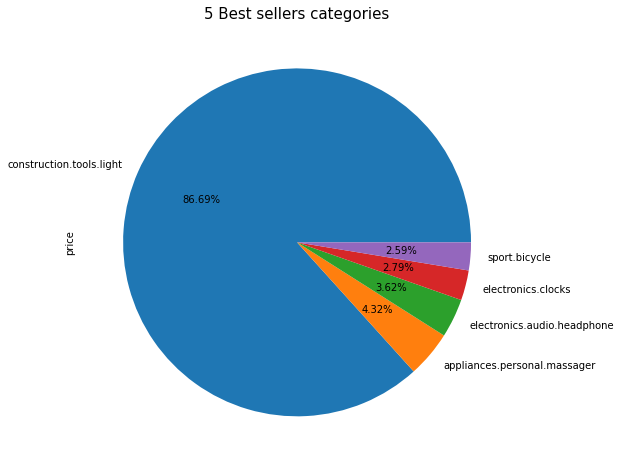

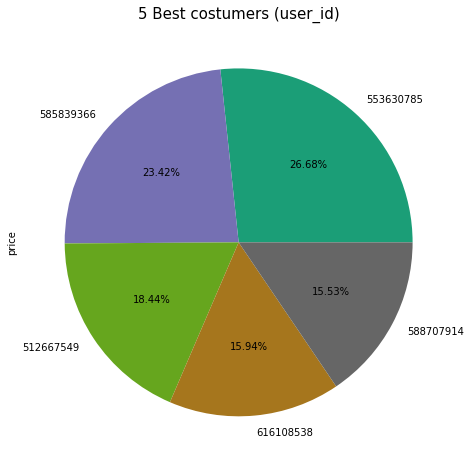

In [49]:
print('\n March 2020 \n')
functions.pareto_brand(datasetMar)
functions.pareto_category(datasetMar)
functions.pareto_user(datasetMar)


 April 2020 



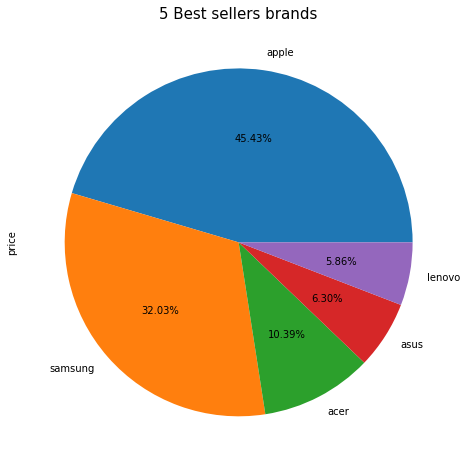

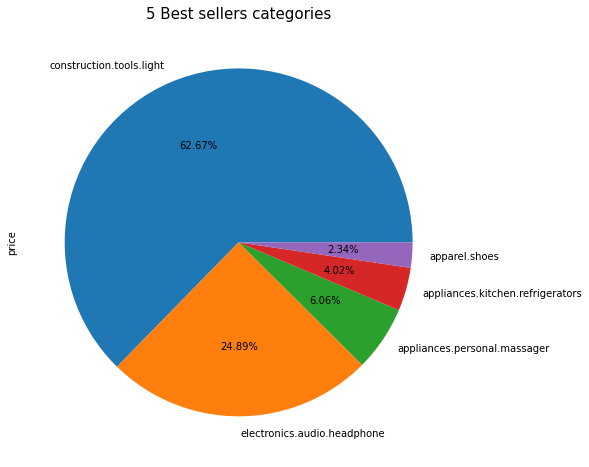

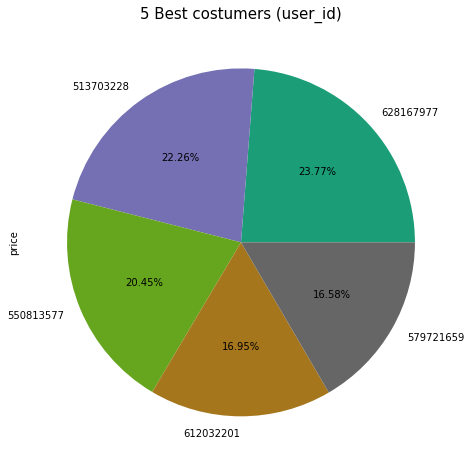

In [50]:
print('\n April 2020 \n')
functions.pareto_brand(datasetApr)
functions.pareto_category(datasetApr)
functions.pareto_user(datasetApr)

#### Comment:
To prove that the Pareto principle applies to the e-commerce, we did an analysis on the products saled grouped by brands; an analysis on the products saled by category code and another one on the products saled by user. \
So the first thing is filter the dataset for event type 'purchase' and group it by brand - category - user_id and then compute the sum of the prices. \
After that, we store into a variable the total sum that is used for the computation of the cumulative sum (used to display the total sum of data as it grows with time) for each element in the list of sales (the data frame previusly converted into a list).
For each product we calculate the percentage, it's given by the ratio between each cumulative sum and the total sum.
Then, in a pie plot, we can see which are the 'top 5' brands - categories - costumers that, according to the Pareto Priciple, are whome who produce biggest incomes which can be considered sufficient for the total monthly receipts.